<a href="https://colab.research.google.com/github/SamyarZamani/GoldPricePrediction/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Date  Price
0 1833-01-01  18.93
1 1833-02-01  18.93
2 1833-03-01  18.93
3 1833-04-01  18.93
4 1833-05-01  18.93
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2309 entries, 0 to 2308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2309 non-null   datetime64[ns]
 1   Price   2309 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 36.2 KB
None


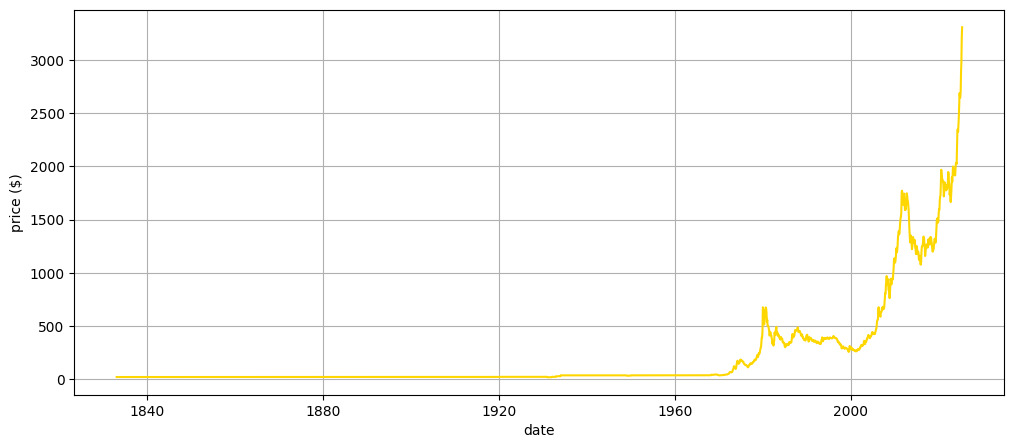

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("monthly.csv", parse_dates=["Date"])


print(df.head())


print(df.info())


plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Price"], color="gold")
plt.xlabel("date")
plt.ylabel("price ($)")
plt.grid(True)
plt.show()


In [2]:
df["Price_1"] = df["Price"].shift(1)
df["Price_2"] = df["Price"].shift(2)
df["Price_3"] = df["Price"].shift(3)

df = df.dropna()

X = df[["Price_1", "Price_2", "Price_3"]]
y = df["Price"]

print(X)
print('''
''')
print(y)

      Price_1  Price_2  Price_3
3       18.93    18.93    18.93
4       18.93    18.93    18.93
5       18.93    18.93    18.93
6       18.93    18.93    18.93
7       18.93    18.93    18.93
...       ...      ...      ...
2304  2648.01  2651.13  2690.08
2305  2709.69  2648.01  2651.13
2306  2894.73  2709.69  2648.01
2307  2983.25  2894.73  2709.69
2308  3217.64  2983.25  2894.73

[2306 rows x 3 columns]


3         18.93
4         18.93
5         18.93
6         18.93
7         18.93
         ...   
2304    2709.69
2305    2894.73
2306    2983.25
2307    3217.64
2308    3309.49
Name: Price, Length: 2306, dtype: float64


Mean Absolute Error (MAE): 24.109
Root Mean Squared Error (RMSE): 38.864


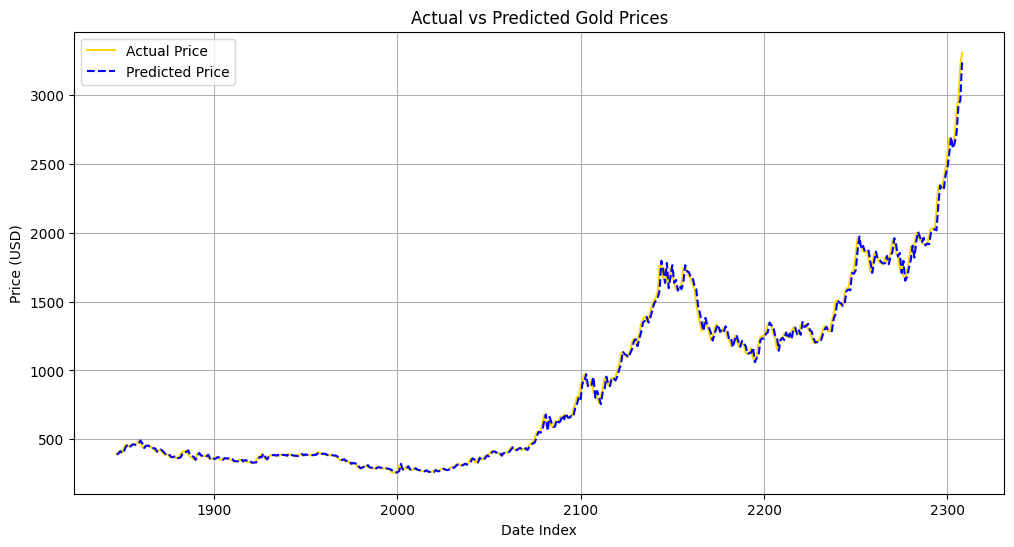

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='gold')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='blue', linestyle='--')
plt.title("Actual vs Predicted Gold Prices")
plt.xlabel("Date Index")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Random Forest MAE: 431.675
Random Forest RMSE: 693.819
Random Forest R²: -0.179
Random Forest MAPE: 29.50%


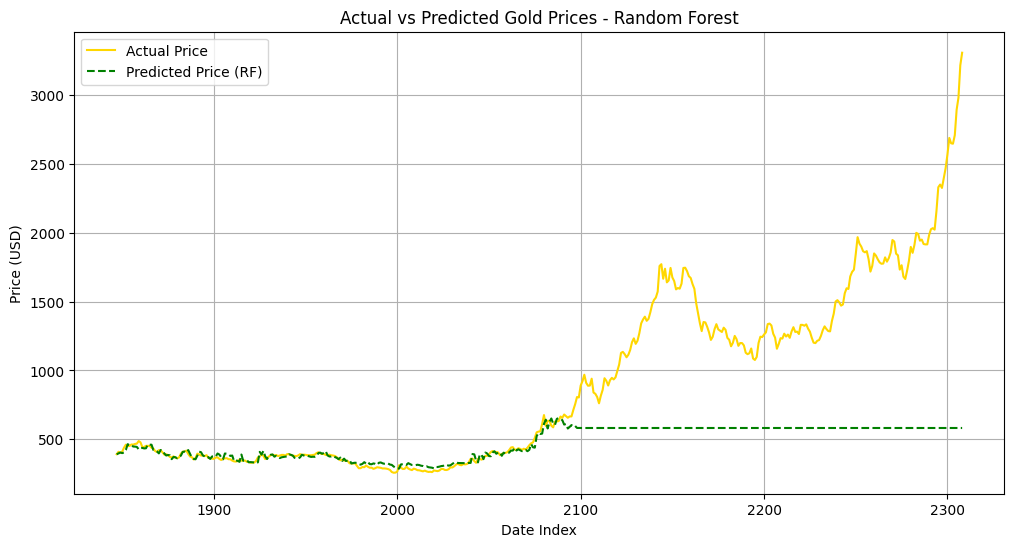

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

print(f"Random Forest MAE: {mae_rf:.3f}")
print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest R²: {r2_rf:.3f}")
print(f"Random Forest MAPE: {mape_rf:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='gold')
plt.plot(y_test.index, y_pred_rf, label='Predicted Price (RF)', color='green', linestyle='--')
plt.title("Actual vs Predicted Gold Prices - Random Forest")
plt.xlabel("Date Index")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = df[["Price"]].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 3
X, y = create_sequences(scaled_data, seq_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")


Shape of X_train: (1842, 3, 1)
Shape of y_train: (1842, 1)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 4.9903e-04 - val_loss: 3.9402e-04
Epoch 2/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2690e-05 - val_loss: 4.1891e-04
Epoch 3/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1512e-05 - val_loss: 0.0016
Epoch 4/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8228e-05 - val_loss: 9.6567e-04
Epoch 5/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1106e-05 - val_loss: 0.0025
Epoch 6/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8958e-05 - val_loss: 4.5641e-04
Epoch 7/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.6705e-05 - val_loss: 6.0492e-04
Epoch 8/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.2209e-05 - val_loss: 0.0028
Epoch 9/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3969e-05 - val_loss: 0.0011
Epoch 10/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9846e-05 - val_loss: 7.1643e-04
Epoch 11/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


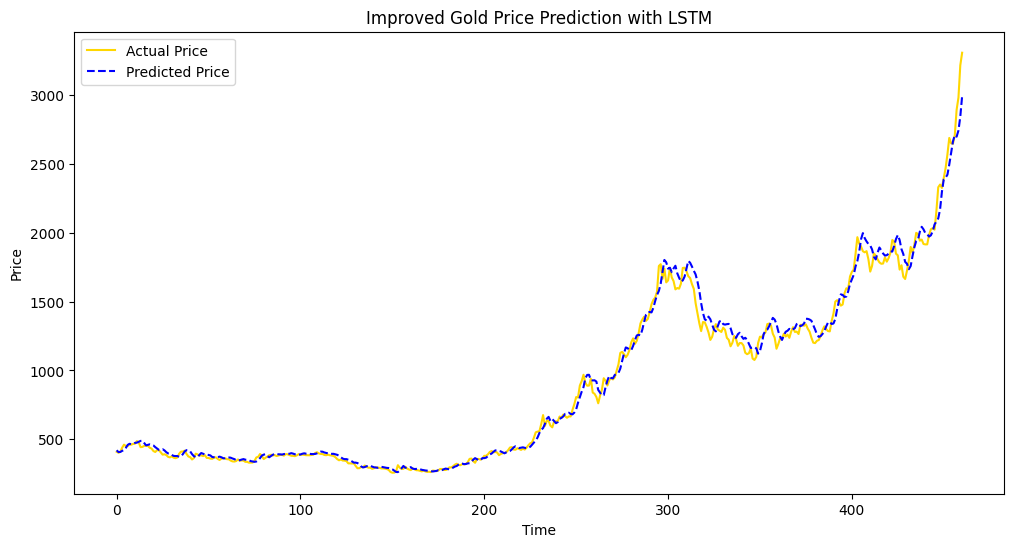

In [7]:
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label='Actual Price', color='gold')
plt.plot(y_pred_rescaled, label='Predicted Price', color='blue', linestyle='--')
plt.title('Improved Gold Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
